In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-prediction-dataset/Lung Cancer Dataset.csv


# Import Libraries

In [2]:
# Data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#WARNINGS
from warnings import filterwarnings
filterwarnings("ignore")

#Data preprocessing
from sklearn.preprocessing import LabelEncoder

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#Model Testing
from sklearn.model_selection import train_test_split, GridSearchCV


# Import Data


**Task 1.1** Import Dataset and load into a DataFrame

In [3]:
df = pd.read_csv("/kaggle/input/lung-cancer-prediction-dataset/Lung Cancer Dataset.csv")
print("Shape of DF",df.shape)
df.head()

Shape of DF (5000, 18)


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


**Task 1.2** Inspect DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

# Exploratory Data Analysis

**Task 2.1** Convert Target `PULMONARY_DISEASE` From Object to int 

In [5]:
df["PULMONARY_DISEASE"] = df["PULMONARY_DISEASE"].replace({"NO":0,"YES":1})

**Task 2.2** Plot Histogram of `Age` of Participants

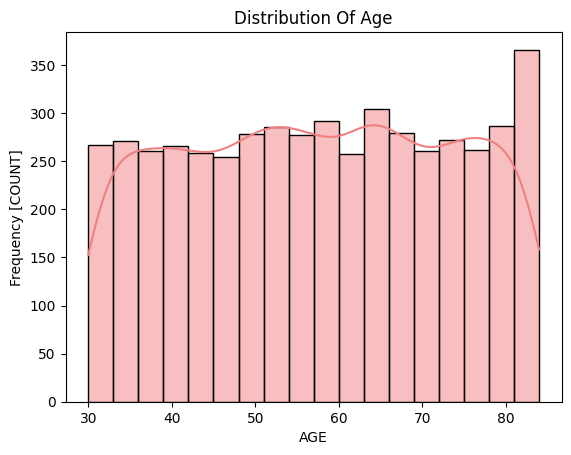

In [6]:
#Disribution OF Age
sns.histplot(df["AGE"],kde=True,color = "lightcoral")
plt.title("Distribution Of Age")
plt.xlabel('AGE')
plt.ylabel("Frequency [COUNT]");

**Task 2.3** Plot the Distribution of `Gender` Among Participants

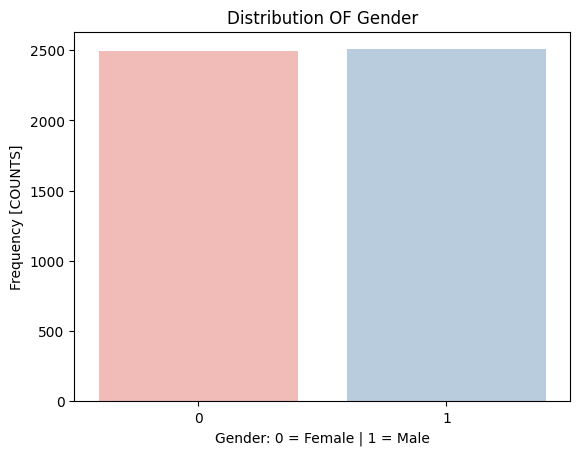

In [7]:
#Distribution Of Gender
sns.countplot(x="GENDER",data=df, palette = "Pastel1")
plt.title("Distribution OF Gender")
plt.xlabel("Gender: 0 = Female | 1 = Male")
plt.ylabel("Frequency [COUNTS]");

**Task 2.4** Plot Relation between `SMOKING` and Target, through a side by side Barchart

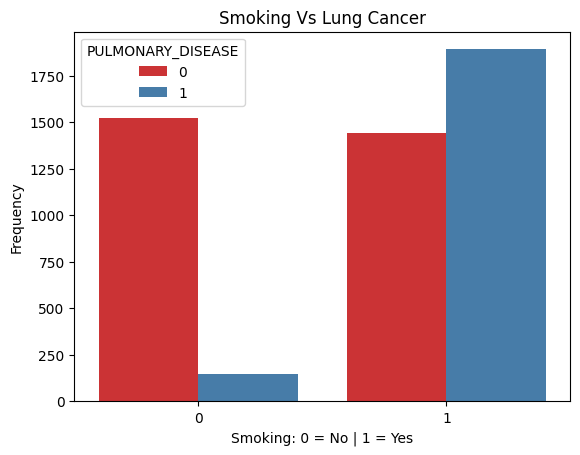

In [8]:
#Smoking And Lung Cancer
sns.countplot(x="SMOKING",hue="PULMONARY_DISEASE",data = df,palette = "Set1")
plt.title("Smoking Vs Lung Cancer")
plt.xlabel("Smoking: 0 = No | 1 = Yes")
plt.ylabel("Frequency");

**Task 2.5** Plot Relation between `FAMILY HISTORY` and Target, through a side by side Barchart

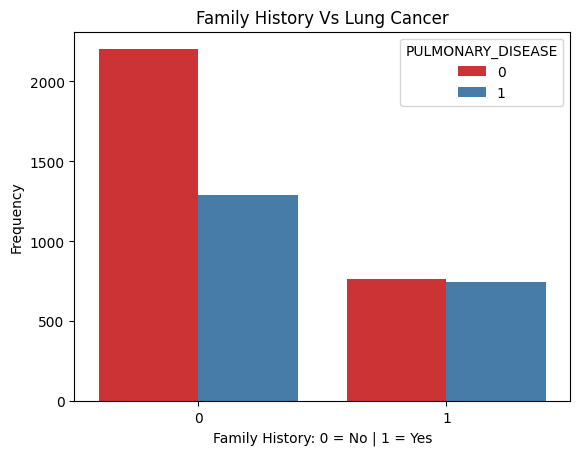

In [9]:
#Family History and Lung cancer
sns.countplot(x="FAMILY_HISTORY",hue="PULMONARY_DISEASE",data = df,palette = "Set1")
plt.title("Family History Vs Lung Cancer")
plt.xlabel("Family History: 0 = No | 1 = Yes")
plt.ylabel("Frequency");

**Task 2.6** Plot Relation between `GENDER` and Target, through a side by side Barchart

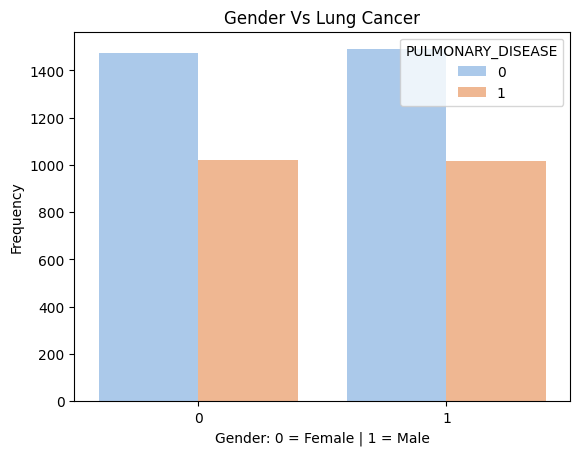

In [10]:
#Gender and Lung Cancer
sns.countplot(x="GENDER",hue="PULMONARY_DISEASE",data = df,palette = "pastel")
plt.title("Gender Vs Lung Cancer")
plt.xlabel("Gender: 0 = Female | 1 = Male")
plt.ylabel("Frequency");

# Data Split

**Task 3.1** Split Data into Feature Matrix `X` and Target Vector `y`

In [11]:
target = "PULMONARY_DISEASE"
X = df.drop(columns = target)
y = df[target]
print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (5000, 17)
y shape : (5000,)


**Task 3.2** Divide Data into `Training` and `Test` sets

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
print("X train shape :",X_train.shape)
print("y train shape :",y_train.shape)
print("X test shape :",X_test.shape)
print("y test shape :",y_test.shape)

X train shape : (4000, 17)
y train shape : (4000,)
X test shape : (1000, 17)
y test shape : (1000,)


# Logistic Regression 

**Task 4.1** Instantiate Logistic Regression model

In [13]:
lr = LogisticRegression()

In [14]:
params_lr = {"max_iter":[100,200,500,1000,2000,5000]}
model_lr = GridSearchCV(lr,
                        param_grid=params_lr,
                        cv=10,
                        n_jobs=-1,
                        verbose=1)
model_lr.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 500, 1000, 2000, 5000]},
             verbose=1)

In [15]:
print("Logistic Model best HyperParameters :",model_lr.best_params_)

Logistic Model best HyperParameters : {'max_iter': 1000}


**Task 4.2** Calculate Accuracy, Precision and Recall for LR model

In [16]:
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test,y_pred_lr)
print(f"Logistic Regression Accuracy : {accuracy_lr}")

cr_lr = classification_report(y_test,y_pred_lr)
print("Logistic Regression Classification Report: \n", cr_lr)

Logistic Regression Accuracy : 0.91
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       571
           1       0.88      0.91      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



**Task 4.3** Plot Confusion Matrix for LR model

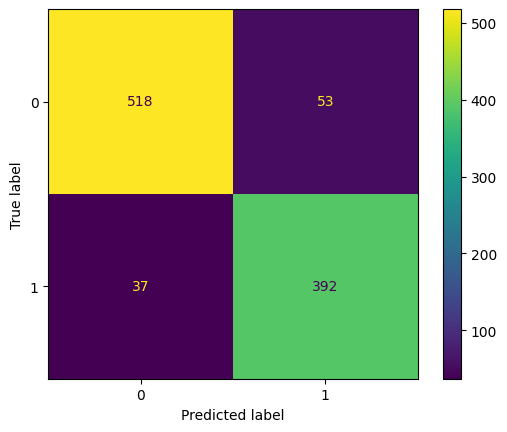

In [17]:
ConfusionMatrixDisplay.from_estimator(model_lr,X_test,y_test);

# Decision Trees

**Task 5.1** Instantiate Decision Tree model

In [18]:
dt = DecisionTreeClassifier(random_state = 42)

In [19]:
param_dt = {
    "max_depth": [5, 10, 20,30,40,50],     
}
model_dt = GridSearchCV(dt,param_grid=param_dt,cv=15,n_jobs=-1,verbose=1)
model_dt.fit(X_train,y_train)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [5, 10, 20, 30, 40, 50]},
             verbose=1)

In [20]:
print("Decision Tree Model best HyperParameters :",model_dt.best_params_)

Decision Tree Model best HyperParameters : {'max_depth': 10}


In [21]:
y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(f"Decision Tree Accuracy : {accuracy_dt}")

cr_dt = classification_report(y_test,y_pred_dt)
print("Decision Tree Classification Report: \n", cr_dt)

Decision Tree Accuracy : 0.872
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       571
           1       0.85      0.85      0.85       429

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



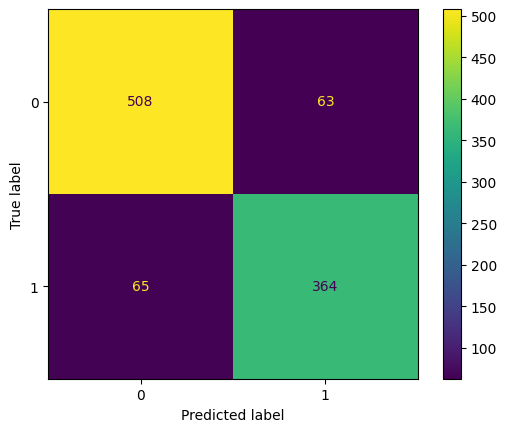

In [22]:
ConfusionMatrixDisplay.from_estimator(model_dt,X_test,y_test);

# Random Forests

In [23]:
rf = RandomForestClassifier(random_state = 42)


In [24]:
params_rf = {
    "n_estimators": [10, 25, 50,75,100,150],  
    "max_depth": [10, 20,30, None],
    "max_features": ["auto","sqrt", "log2"]  
} 
model_rf = GridSearchCV(rf,
                     param_grid=params_rf,
                     cv=10,
                     n_jobs=-1,
                     verbose=1 
                    )
model_rf.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25, 50, 75, 100, 150]},
             verbose=1)

In [25]:
print(" Random Forest Best HyperParameters:", model_rf.best_params_)

 Random Forest Best HyperParameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}


In [26]:
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(f"Random Forest Accuracy : {accuracy_rf}")

cr_rf = classification_report(y_test,y_pred_rf)
print("Random Forest Classification Report: \n", cr_rf)

Random Forest Accuracy : 0.911
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       571
           1       0.90      0.89      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



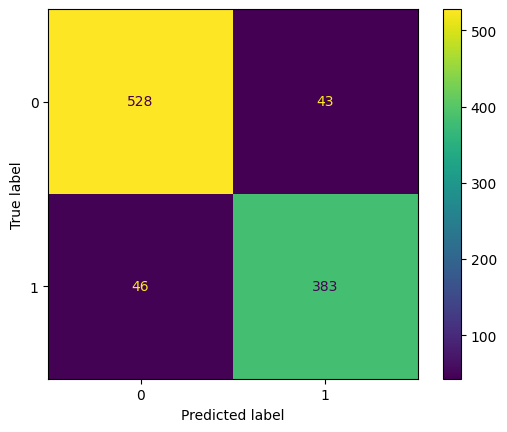

In [27]:
ConfusionMatrixDisplay.from_estimator(model_rf,X_test,y_test);

# Feature Importances

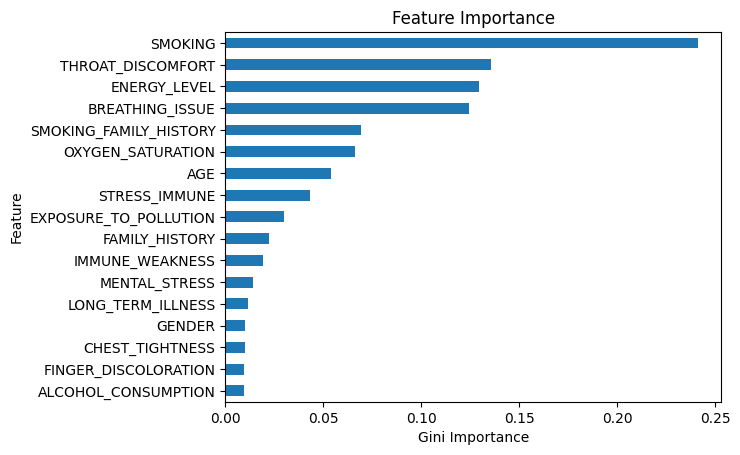

In [28]:
features = X.columns

importances = model_rf.best_estimator_.feature_importances_

feat_imp = pd.Series(importances,index=features).sort_values()

feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# Model Performance Comparison

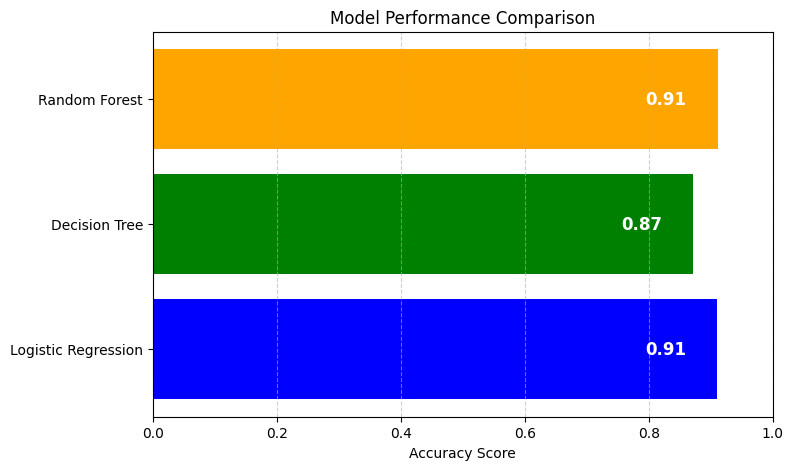

In [29]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf] 

# Plot
plt.figure(figsize=(8, 5))
y_pos = np.arange(len(model_names))

plt.barh(y_pos, accuracy_scores, color=['blue', 'green', 'orange'])
plt.yticks(y_pos, model_names)
plt.xlabel("Accuracy Score")
plt.title("Model Performance Comparison")

# Display values on bars
for index, value in enumerate(accuracy_scores):
    plt.text(value - 0.05, index, f"{value:.2f}", va='center', ha='right', color='white', fontsize=12, fontweight='bold')

plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()